# Web-Scraping

**Web scraping** ou raspagem de dados é um método para extrair e armazenar dados de websites de forma **automatizada** e **estruturada**.
<div>
<img src=attachment:8737231f-fb30-4b8c-b2fa-bd729783b9f1.png width="850"/>
</div>
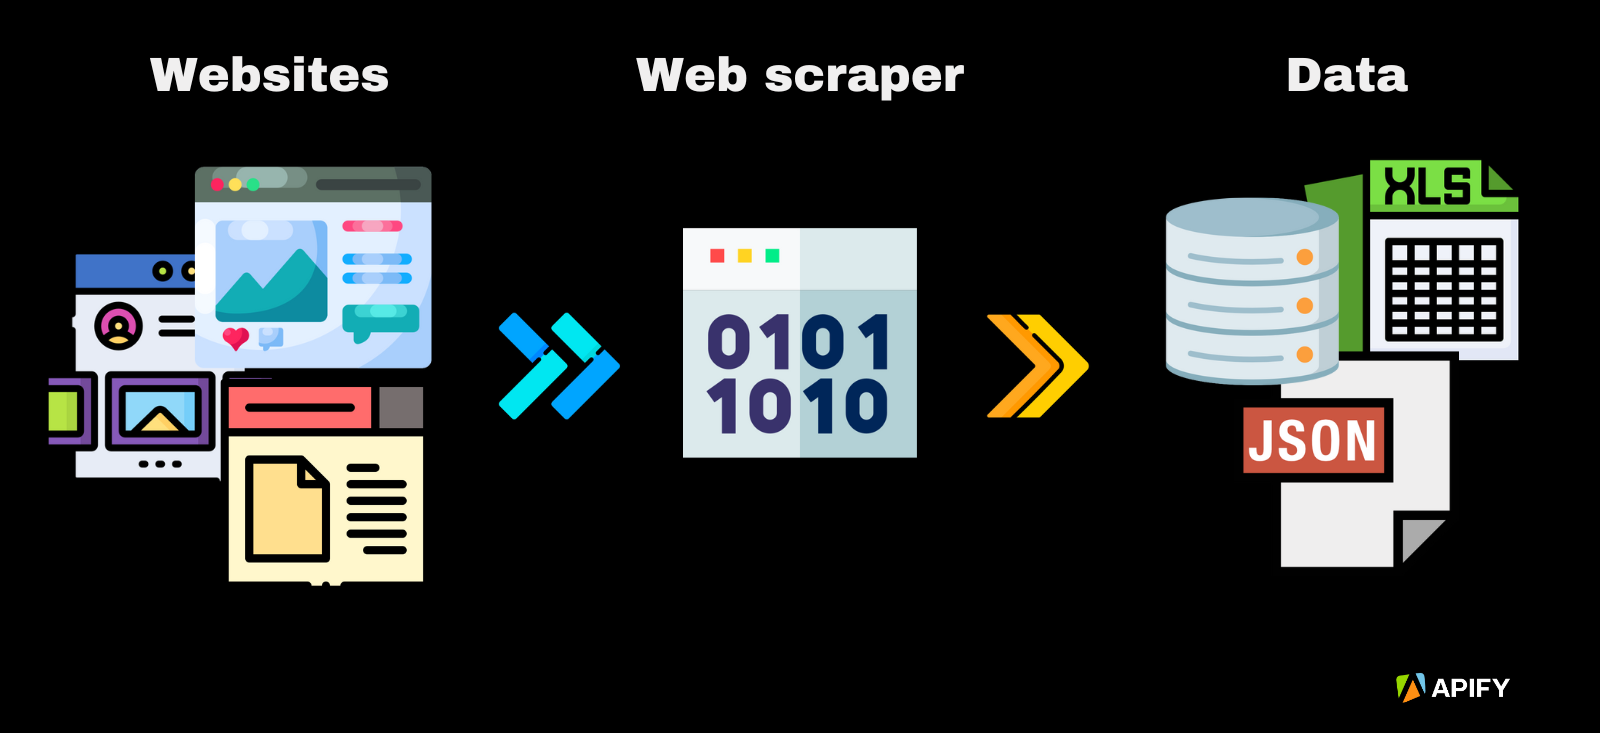

O processo de web scraping funciona da seguinte maneira:

- **Envio de Solicitação:** Um script ou programa envia uma requisição HTTP (como GET) ao servidor web para acessar uma página específica.

- **Recebimento do HTML:** O servidor retorna o HTML da página solicitada, que contém todo o conteúdo da página, incluindo texto, imagens, links e outros elementos.

- **Parsing do HTML:** O script analisa o HTML recebido, utilizando bibliotecas como BeautifulSoup (em Python), para identificar e extrair os dados desejados, como textos dentro de tags específicas, tabelas, ou links.

- **Armazenamento:** Os dados extraídos são organizados e armazenados em um formato estruturado, como CSV, JSON, ou diretamente em um banco de dados.



### HTML - HyperText Markup Language
**HTML** é a linguagem padrão usada para criar e estruturar conteúdo na web, definindo a estrutura e apresentação de texto, imagens, links e outros elementos em websites.

#### Elemento HTML
- Geralmente contém três componentes
    - Tag de abertura;
    - Conteúdo;
    - Tag de fechamento
    
<div>
<img src=attachment:image-3.png width="400"/>
</div>
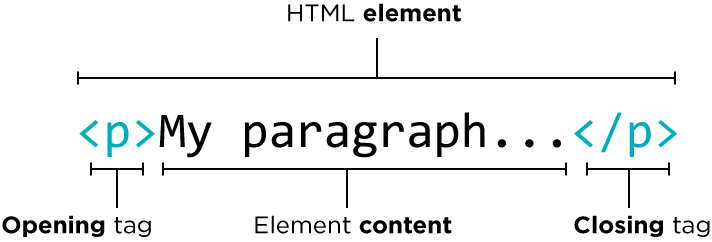

#### Estrutura básica de um documento HTML

<div>
<img src=attachment:image-4.png width="400"/>
</div>
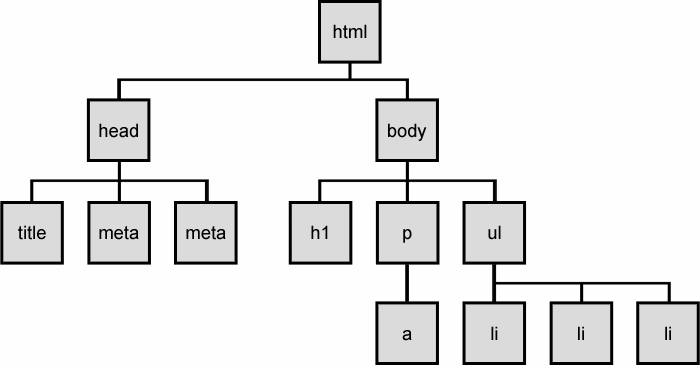

#### Principais Tags HTML
- $<html>...</html>$: Conteúdo HTML
- $<head>...</head>$: Cabeçalho do documento
- $<title>...</title>$: Título da página HTML
- $<body>...</body>$: Corpo do documento (página)
- $<h1>...</h1>$: Cabeçalho de nível 1
- $<p>...</p>$: Parágrafo
- $<div>...</div>$: Conteúdo Gerérico

### Protocolo HTTP - Hypertext Transfer Protocol
**HTTP** é um protocolo para transmissão de informação que define como os sites são acessados

<div>
<img src=attachment:image-6.png width="400"/>
</div>


#### Métodos de requisição e resposta
- **GET:** Solicita um recurso para o servidor (website)
- **POST:** Envia uma informação para o servidor
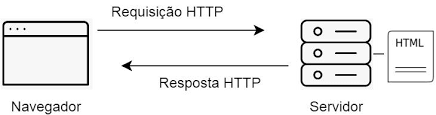

<div>
<img src=attachment:1831d731-5738-4402-9d64-335b48ffbe0d.png width="200"/>
</div>

# Atenção - Evite práticas ilegais e antiéticas
#### Respeite as regras contidas do documento **Robots.txt**. 
O scraper deve seguir as regras estabelecidas no arquivo robots.txt do site e respeitar os termos de uso para evitar práticas ilegais ou antiéticas.

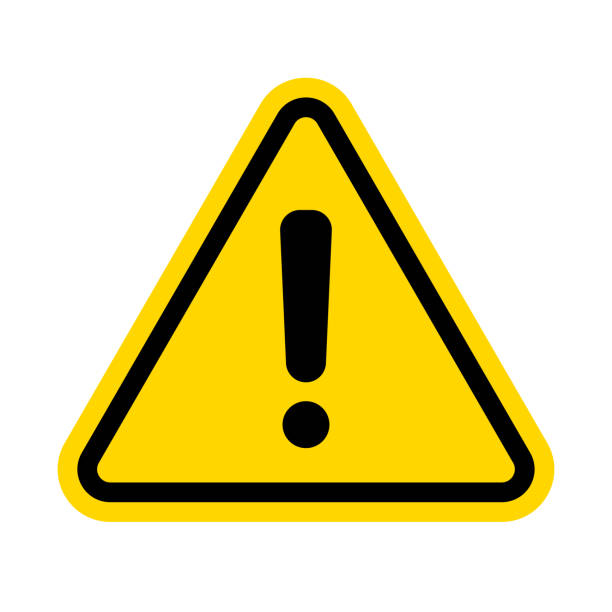

# Mão na massa

### Exemplo 1: Obtendo informações de uma página web

#### Passo 1: instalar bibliotecas

In [ ]:
# Remova o comentário(#) da linha abaixo caso esteja executando este script pela primeira vez
#!pip install requests

#### Passo 2: Importar bibliotecas

In [ ]:
import requests

#### Passo 3: Requisitar informações de um website

In [ ]:
response = requests.get('https://www.cps.sp.gov.br/')

#### Passo 4: Visualizar elementos HMTL

In [ ]:
print('Código de status:', response.status_code) # O código de status 200 OK significa que a solicitação foi bem-sucedida

### Interpretando o Código de status
Os códigos de status são divididos em categorias:
- 2xx para sucesso
- 3xx para redirecionamentos
-  4xx para erros do cliente
-  5xx para erros do servidor.
  
Saber interpretar esses códigos é essencial para implementar lógicas de tratamento de erro e sucesso em suas aplicações.

In [ ]:
print('Cabeçalho:', response.headers)

In [ ]:
print('Conteúdo:', response.content)

### Exemplo 2: Conhecendo o BeautifulSoup

#### Passo 1: instalar bibliotecas

In [ ]:
# Remova o comentário(#) da linha abaixo caso esteja executando este script pela primeira vez
#!pip install beautifulsoup4

#### Passo 2: Importar bibliotecas

In [ ]:
from bs4 import BeautifulSoup

#### Passo 3: Requisitar informações de um website

In [ ]:
response = requests.get('https://www.cps.sp.gov.br/')

#### Passo 4: Conectar o site com a biblioteca BeautifulSoup

In [ ]:
soup = BeautifulSoup(response.content, 'html.parser') # html.parser serve para ler o arquivo HTML que será visualizado em BeautifulSoup

#### Passo 5: Visualizar HTML

In [ ]:
print(soup)
#print(soup.prettify())

#### Passo 6: Visualizar elementos específicos

In [ ]:
print(soup.title)
#print(soup.title.text)

In [ ]:
print(soup.find('title'))
#print(soup.find('title').text)

In [ ]:
print(soup.find('p'))
#print(soup.find('p').text)

#### Passo 7: Filtrar atributos

In [ ]:
# Dica: use o comando inspecionar página (function+F12)
barra_nav = soup.find('nav', attrs={'class': 'main-menu-container menu-mobile-inativo'})
print(barra_nav)

In [ ]:
menu = barra_nav.find('ul', attrs={'class': 'menu'})
print(menu)

In [ ]:
pos = menu.find('li', attrs={'id': 'menu-item-80637'})
print(pos)

#### Passo 8: Listar links

In [ ]:
# O método .find extrai somente o primeiro item
link = pos.find('a')
print(link)

In [ ]:
# O método .find_all extrai todos os itens
links = pos.find_all('a')
print(links)

In [ ]:
# Contar quantos links foram listados
len(links)

In [ ]:
# Podemos visualizar os links pelo índice de armazenamento
print(links[2].text)

#### Passo 10: Visualizar atributos

In [ ]:
print(links[2].attrs)

#### Passo 11: Extrair atributos específicos

In [ ]:
print(links[2]['href'])

#### Passo 12: Extrair uma lista de atributos
Neste exemplo, iremos extrarir todos os links da barra de navegação

In [ ]:
for i in links:
    try:
        print(i['href'])
    except:
        print(i.text)

### Exemplo 3: Regras para encontrar elemento no BeautifulSoup
Neste exemplo, vamos aproveitar os passos do exercício anterior
- Passo 1: Instalar bibliotecas
- Passo 2: Importar bibliotecas
- Passo 3: Requisitar informação de um website
- Passo 4: Conectar o site com a biblioteca BeautifulSoup

E vamos explorar outras regras para encontrar elementos (.find)
- por classe
- por id
- por atributos
- por textos
- por pedaços de texto

#### Passo 5: Encontrar elemento por atributo
*.find*(nome do atributo = dados do atributo)

In [ ]:
# Encontrar por classe
# Atenção ao atributo class, pois é uma palavra reservado do Python. Neste caso usa-se class_ (com underline)
barra_nav2 = soup.find(class_ = 'main-menu-container menu-mobile-inativo')
print(barra_nav2)

In [ ]:
# Encontrar por id
pos2 = soup.find(id = 'menu-item-80637')
print(pos2)

In [ ]:
# Encontrar por atributos
atr = soup.find('img')
print(atr)

In [ ]:
# Encontrar por texto 
texto_exato = soup.find(string = 'Mestrado Profissional em Gestão e Tecnologia em Sistemas Produtivos')
print(texto_exato)

In [ ]:
# Encontrar por partes de texto
import re # regular expressions

parte_do_texto = soup.find_all(string = re.compile('Mestrado'))
print(parte_do_texto)

#### Passo 6 Encontrar elemento que contém o texto da busca
Neste passo iremos usar as funções **parent** e **contents**

In [ ]:
# Repita o comando .parent até esgotar a identação da página
parent_texto = texto_exato.parent
print(parent_texto)

In [ ]:
# O conceito do comando contents é analogo ao parent, mas navega na direção contrária
print(parent_texto.contents)

## Exercício 
- Repita esses passos utilizando outro website;
- Explore os elementos HTML com a ferramenta inspecionar do navegador;
- Escolha uma barra de navegação e extraia todos os links.